In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# 2. IMPORT DATASET
data = pd.read_csv('/content/iris (3).csv')

In [2]:
# 3. DISPLAY BASIC INFORMATION
print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset Info:")
data.info()

print("\nUnique target values:", data['target'].unique())
print("\nDataset Shape:", data.shape)
print("\nChecking for nulls:\n", data.isnull().sum())
print("\nChecking for duplicates:", data.duplicated().sum())

# Drop nulls and duplicates
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

print("\nStatistical Summary:")
print(data.describe())

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB

Unique target values: [0 1 2]

Dataset Shape: (150, 5)

Checking for nulls:
 sepal_length    0
sepal_width     0
pet

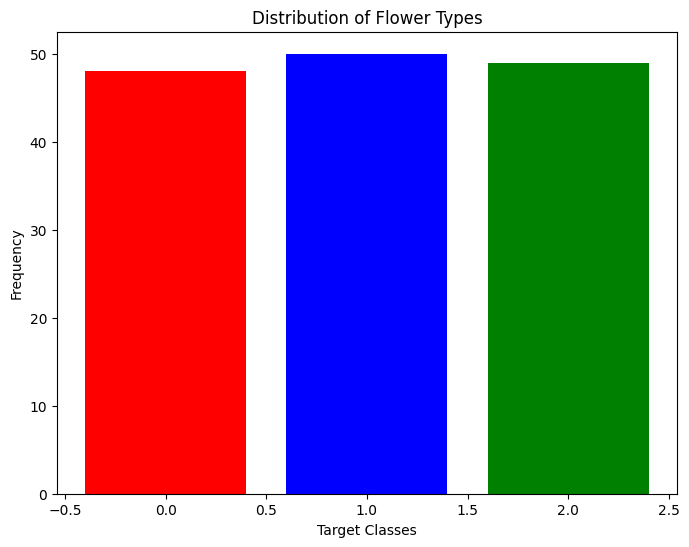

In [3]:
# 4. EDA: Bar Plot of Target Distribution
target_counts = Counter(data['target'])
plt.figure(figsize=(8,6))
plt.bar(target_counts.keys(), target_counts.values(), color=['red','blue','green'])
plt.xlabel('Target Classes')
plt.ylabel('Frequency')
plt.title('Distribution of Flower Types')
plt.show()

# 5. FEATURES SEPARATION
x = data.iloc[:, [0, 1, 2, 3]].values  # features only

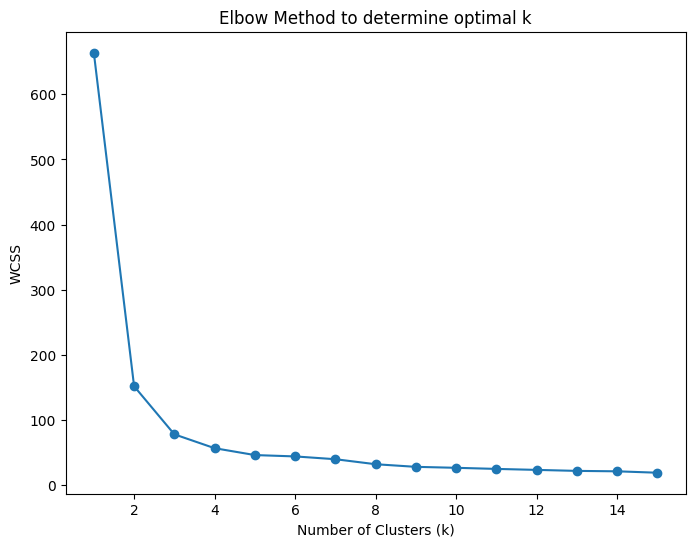

In [5]:
# 6. ELBOW METHOD TO DETERMINE OPTIMAL K
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1, 16), wcss, marker='o')
plt.title('Elbow Method to determine optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [6]:
# 7. APPLYING K-MEANS FOR K=3 AND K=4
kmeans3 = KMeans(n_clusters=3, random_state=1)
y_pred3 = kmeans3.fit_predict(x)

kmeans4 = KMeans(n_clusters=4, random_state=1)
y_pred4 = kmeans4.fit_predict(x)

print("\nCluster Labels for k=3:", y_pred3)
print("Cluster Labels for k=4:", y_pred4)


Cluster Labels for k=3: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0 0 0
 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2]
Cluster Labels for k=4: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0 0 0
 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 3 0 3 3 3 3 2 3 3 3 0 0 3
 0 0 3 3 3 3 0 3 0 3 0 3 3 0 0 3 3 3 3 3 0 0 3 3 3 0 3 3 3 3 3 3 0 0 3 0]


In [7]:
# 8. SILHOUETTE SCORES
score3 = silhouette_score(x, y_pred3)
score4 = silhouette_score(x, y_pred4)
print("\nSilhouette Score for k=3:", score3)
print("Silhouette Score for k=4:", score4)


Silhouette Score for k=3: 0.5493074238267263
Silhouette Score for k=4: 0.49397403978627596


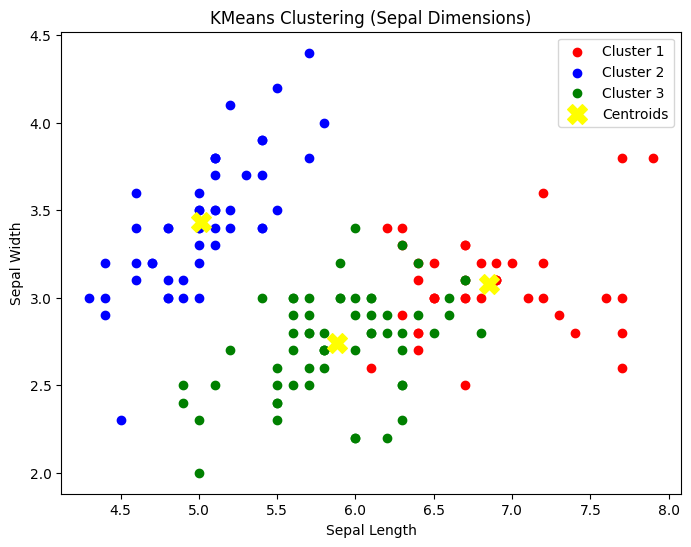

In [8]:
# 9. VISUALIZATION - Sepal Dimensions
plt.figure(figsize=(8,6))
plt.scatter(x[y_pred3 == 0, 0], x[y_pred3 == 0, 1], c='red', label='Cluster 1')
plt.scatter(x[y_pred3 == 1, 0], x[y_pred3 == 1, 1], c='blue', label='Cluster 2')
plt.scatter(x[y_pred3 == 2, 0], x[y_pred3 == 2, 1], c='green', label='Cluster 3')
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1],
            c='yellow', marker='X', s=200, label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KMeans Clustering (Sepal Dimensions)')
plt.legend()
plt.show()


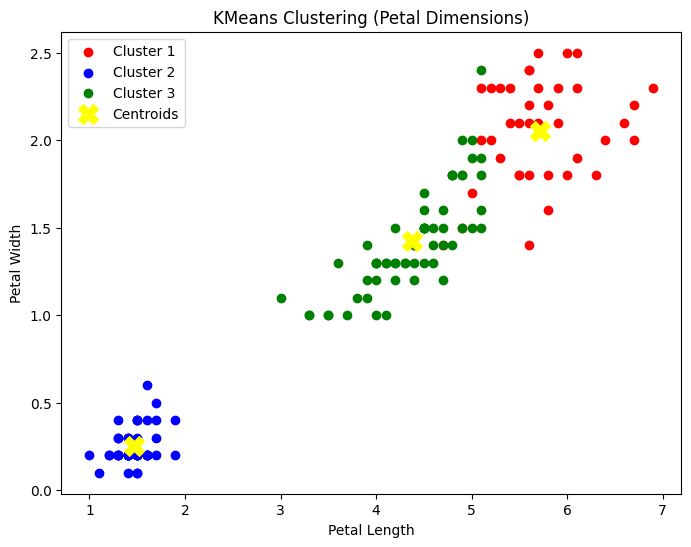

In [9]:
# 10. VISUALIZATION - Petal Dimensions
plt.figure(figsize=(8,6))
plt.scatter(x[y_pred3 == 0, 2], x[y_pred3 == 0, 3], c='red', label='Cluster 1')
plt.scatter(x[y_pred3 == 1, 2], x[y_pred3 == 1, 3], c='blue', label='Cluster 2')
plt.scatter(x[y_pred3 == 2, 2], x[y_pred3 == 2, 3], c='green', label='Cluster 3')
plt.scatter(kmeans3.cluster_centers_[:, 2], kmeans3.cluster_centers_[:, 3],
            c='yellow', marker='X', s=200, label='Centroids')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('KMeans Clustering (Petal Dimensions)')
plt.legend()
plt.show()

NUMPY

In [10]:
# ✅ Essential 1D Array Operations using NumPy (Covers 80% Usage)

import numpy as np

# Create a 1D array
a = np.array([10, 20, 30, 40, 50])

# 1. Element-wise Arithmetic
print(a + 5)     # [15 25 35 45 55] → Add 5 to each element
print(a - 10)    # [ 0 10 20 30 40] → Subtract 10 from each element
print(a * 2)     # [ 20  40  60  80 100] → Multiply each by 2
print(a / 2)     # [ 5. 10. 15. 20. 25.] → Divide each by 2

# 2. Aggregate Operations
print(np.sum(a))     # 150 → Sum of all elements
print(np.prod(a))    # 12000000 → Product of all elements

# 3. Basic Statistics
print(np.mean(a))    # 30.0 → Average
print(np.median(a))  # 30.0 → Median value
print(np.std(a))     # 14.14... → Standard Deviation
print(np.var(a))     # 200.0 → Variance

# 4. Min / Max / Range
print(np.min(a))     # 10 → Minimum value
print(np.max(a))     # 50 → Maximum value
print(np.ptp(a))     # 40 → Range (max - min)

# 5. Sorting and Indexing
print(np.sort(a))    # [10 20 30 40 50] → Sorted array
print(np.argsort(a)) # [0 1 2 3 4] → Indexes of sorted elements

# 6. Filtering with Boolean Mask
print(a[a > 25])     # [30 40 50] → Elements greater than 25

# 7. Cumulative Sum / Product
print(np.cumsum(a))  # [ 10  30  60 100 150] → Cumulative sum
print(np.cumprod(a)) # [     10    200   6000 240000 12000000] → Cumulative product

# 8. Differences Between Consecutive Elements
print(np.diff(a))    # [10 10 10 10] → Differences between elements

# 9. Unique Values and Their Counts
b = np.array([10, 20, 20, 30, 30, 30])
print(np.unique(b))                       # [10 20 30] → Unique values
print(np.unique(b, return_counts=True))  # (array([10, 20, 30]), array([1, 2, 3])) → Value counts

# 10. Basic Mathematical Functions
print(np.sqrt(a))    # [3.16 4.47 5.47 6.32 7.07] → Square root
print(np.log(a))     # Natural log of each element
print(np.exp(a))     # Exponential (e^x) of each element


[15 25 35 45 55]
[ 0 10 20 30 40]
[ 20  40  60  80 100]
[ 5. 10. 15. 20. 25.]
150
12000000
30.0
30.0
14.142135623730951
200.0
10
50
40
[10 20 30 40 50]
[0 1 2 3 4]
[30 40 50]
[ 10  30  60 100 150]
[      10      200     6000   240000 12000000]
[10 10 10 10]
[10 20 30]
(array([10, 20, 30]), array([1, 2, 3]))
[3.16227766 4.47213595 5.47722558 6.32455532 7.07106781]
[2.30258509 2.99573227 3.40119738 3.68887945 3.91202301]
[2.20264658e+04 4.85165195e+08 1.06864746e+13 2.35385267e+17
 5.18470553e+21]


In [11]:
# ✅ Essential 2D Array Operations using NumPy (Covers 80% Usage)

import numpy as np

# Create a 2D array (matrix)
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# 1. Element-wise Arithmetic
print(a + 10)  # Add 10 to each element
# [[11 12 13]
#  [14 15 16]
#  [17 18 19]]

print(a * 2)   # Multiply each element by 2
# [[ 2  4  6]
#  [ 8 10 12]
#  [14 16 18]]

# 2. Aggregate Operations
print(np.sum(a))         # 45 → Total sum
print(np.sum(a, axis=0)) # [12 15 18] → Column-wise sum
print(np.sum(a, axis=1)) # [ 6 15 24] → Row-wise sum

print(np.prod(a))        # 362880 → Total product

# 3. Basic Statistics
print(np.mean(a))        # 5.0 → Overall mean
print(np.mean(a, axis=0))# [4. 5. 6.] → Mean per column
print(np.mean(a, axis=1))# [2. 5. 8.] → Mean per row

print(np.median(a))      # 5.0 → Median of all elements

print(np.std(a))         # ~2.58 → Standard Deviation
print(np.var(a))         # ~6.67 → Variance

# 4. Min / Max
print(np.min(a))         # 1
print(np.max(a))         # 9
print(np.ptp(a))         # 8 → Range (max - min)

# 5. Sorting (Row-wise)
print(np.sort(a))
# [[1 2 3]
#  [4 5 6]
#  [7 8 9]]

# 6. Indexing / Slicing
print(a[1, 2])  # 6 → Element at row 1, col 2
print(a[0])     # [1 2 3] → First row
print(a[:, 1])  # [2 5 8] → Second column

# 7. Boolean Masking
print(a[a > 5])  # [6 7 8 9] → Elements > 5

# 8. Cumulative Ops (Flattened)
print(np.cumsum(a))  # [ 1  3  6 10 15 21 28 36 45]
print(np.cumprod(a)) # [  1   2   6  24 120 720 5040 40320 362880]

# 9. Differences Between Elements (Row-wise)
print(np.diff(a, axis=1))
# [[1 1]
#  [1 1]
#  [1 1]] → Differences between columns

# 10. Transpose and Shape
print(a.T)
# [[1 4 7]
#  [2 5 8]
#  [3 6 9]] → Transposed matrix

print(a.shape)  # (3, 3) → Shape of matrix

# 11. Flatten
print(a.flatten())  # [1 2 3 4 5 6 7 8 9] → 1D version

# 12. Unique Elements
b = np.array([[1, 2, 2], [3, 3, 3]])
print(np.unique(b))                        # [1 2 3]
print(np.unique(b, return_counts=True))    # (array([1, 2, 3]), array([1, 2, 3]))


[[11 12 13]
 [14 15 16]
 [17 18 19]]
[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]
45
[12 15 18]
[ 6 15 24]
362880
5.0
[4. 5. 6.]
[2. 5. 8.]
5.0
2.581988897471611
6.666666666666667
1
9
8
[[1 2 3]
 [4 5 6]
 [7 8 9]]
6
[1 2 3]
[2 5 8]
[6 7 8 9]
[ 1  3  6 10 15 21 28 36 45]
[     1      2      6     24    120    720   5040  40320 362880]
[[1 1]
 [1 1]
 [1 1]]
[[1 4 7]
 [2 5 8]
 [3 6 9]]
(3, 3)
[1 2 3 4 5 6 7 8 9]
[1 2 3]
(array([1, 2, 3]), array([1, 2, 3]))
